# Pre-class Assignment 1 - Classification of irises



### [Problem 1] Select features and categories for practice

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The data frame from last assignment
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
#Extract data frame
df = df[['sepal_length', 'petal_length', 'Species']][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


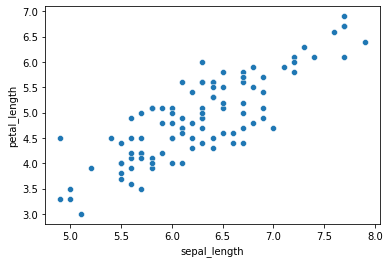

In [3]:
#Visualize the data
sns.scatterplot(x='sepal_length', y='petal_length', data=df)
sns.set()

### [Problem 2] Data analysis

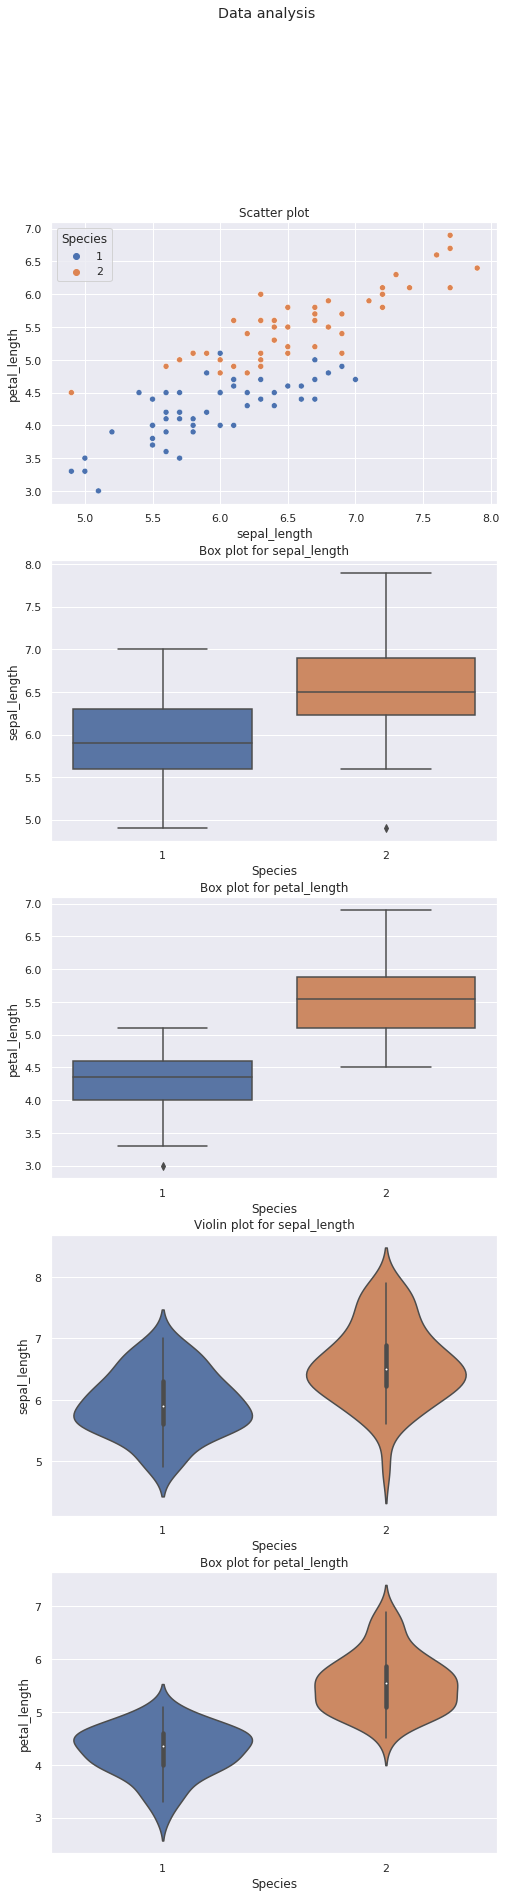

In [4]:
fig, ax = plt.subplots(5, 1, figsize=(8, 30))

fig.suptitle('Data analysis')

ax[0].title.set_text('Scatter plot')
sns.scatterplot(ax=ax[0], x='sepal_length', y='petal_length', hue='Species', palette='deep', data=df)
ax[1].title.set_text('Box plot for sepal_length')
sns.boxplot(ax=ax[1], x='Species', y='sepal_length', data=df)
ax[2].title.set_text('Box plot for petal_length')
sns.boxplot(ax=ax[2], x='Species', y='petal_length', data=df)
ax[3].title.set_text('Violin plot for sepal_length')
sns.violinplot(ax=ax[3], x='Species', y='sepal_length', data=df)
ax[4].title.set_text('Box plot for petal_length')
sns.violinplot(ax=ax[4], x='Species', y='petal_length', data=df)

sns.set()

### [Problem 3] Division of preprocessing/training data and verification data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


### [Problem 4] Pretreatment/Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[ 0.34890138  0.36098353]
 [ 0.20745487  0.47619104]
 [ 0.63179439  1.05222858]
 [ 2.04625943  2.31951119]
 [-0.35833114  0.13056851]
 [-0.78267066 -1.59754413]
 [-0.64122415 -0.90629907]
 [ 0.9146874   0.24577602]
 [-0.07543814 -0.44546904]
 [ 0.20745487  0.70660606]
 [-0.21688464 -0.21505402]
 [ 0.77324089  0.70660606]
 [-1.91424269 -1.82795915]
 [-0.78267066  0.13056851]
 [ 0.20745487  0.47619104]
 [-0.49977765 -0.79109156]
 [ 0.06600837  0.015361  ]
 [-0.21688464 -1.02150658]
 [-1.48990318 -1.13671409]
 [-0.78267066 -0.44546904]
 [-0.49977765 -0.09984651]
 [ 0.63179439  0.93702107]
 [ 0.63179439 -0.56067654]
 [ 0.06600837  0.82181357]
 [-0.64122415 -1.02150658]
 [ 0.06600837 -0.56067654]
 [-1.06556367 -1.02150658]
 [ 1.33902691  1.05222858]
 [ 1.90481293  1.97388866]
 [ 0.06600837  0.015361  ]
 [-0.35833114 -0.44546904]
 [-0.92411716 -0.79109156]
 [-1.91424269 -0.44546904]
 [ 0.63179439  0.13056851]
 [ 0.63179439  0.93702107]
 [ 2.04625943  1.39785111]
 [ 1.62191992  1.39785111]
 

### [Problem 5] Learning and estimation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns', None)

neigh5 = KNeighborsClassifier()
neigh5.fit(X_train_scaled, y_train)
predict_5 = neigh5.predict(X_test_scaled)
result_5 = pd.DataFrame([predict_5, y_test], index=['Predict', 'Actual value'])
result_5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [19]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train_scaled, y_train)
predict_3 = neigh3.predict(X_test_scaled)
result_3 = pd.DataFrame([predict_3, y_test], index=['Predict', 'Actual value'])
result_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,2,2,1,2,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [20]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_scaled, y_train)
predict_1 = neigh1.predict(X_test_scaled)
result_1 = pd.DataFrame([predict_1, y_test], index=['Predict', 'Actual value'])
result_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,2,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


### [Problem 6] Evaluation

In [21]:
from sklearn.metrics import *

acc_score = accuracy_score(y_test, predict_5) 
acc_score

0.96

The accuracy score represent how much predict values is exactly the same as the actual value.
For example, we got 21/25 correct value from the above table, which equals to 0.84 of all test samples.

In [22]:
prec_score = precision_score(y_test, predict_5) 
prec_score

1.0

The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

In [23]:
recall_score = recall_score(y_test, predict_5)
recall_score

0.9285714285714286

The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [24]:
f1_score = f1_score(y_test, predict_5)
f1_score

0.962962962962963

The F1 score can be interpreted as a weighted average of the precision and recall and it is calculated by: 

`F1 = 2 * (precision * recall) / (precision + recall)`

In [25]:
confusion_matrix = confusion_matrix(y_test, predict_5)
confusion_matrix

array([[13,  1],
       [ 0, 11]])

Confusion matrix represents these value:

$\begin{pmatrix}
\text{true negative} & \text{false positive}\\
\text{false negative} & \text{true positive}\\
\end{pmatrix}$

### [Problem 7] Visualization

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

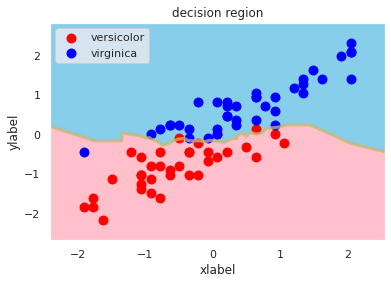

In [27]:
decision_region(X_train_scaled, y_train, neigh5)

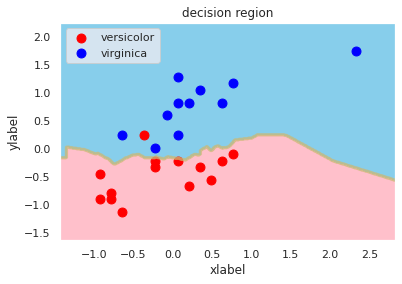

In [28]:
decision_region(X_test_scaled, y_test, neigh5)

### [Problem 8] Learning by other methods

Logistic regression

In [29]:
#Create function to calculate all scores/evaluations
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

In [30]:
from sklearn.linear_model import *

#Using Logistic Regression
logregression = LogisticRegression()
logregression.fit(X_train_scaled, y_train)
log_predict = logregression.predict(X_test_scaled)
result_log = pd.DataFrame([log_predict, y_test], index=['Predict', 'Actual value'])
result_log

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [31]:
evaluation(y_test, log_predict)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


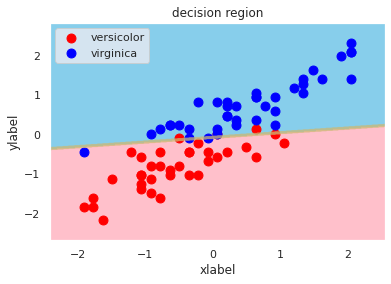

In [32]:
decision_region(X_train_scaled, y_train, logregression)

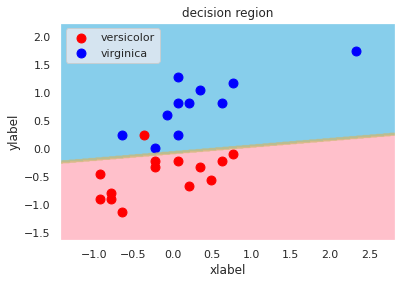

In [33]:
decision_region(X_test_scaled, y_test, logregression)

SVM

In [34]:
from sklearn.svm import *
from sklearn.pipeline import make_pipeline
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_scaled, y_train)
svm_predict = svm.predict(X_test_scaled)
result_svm = pd.DataFrame([svm_predict, y_test], index=['Predict', 'Actual value'])
result_svm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [35]:
evaluation(y_test, svm_predict)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


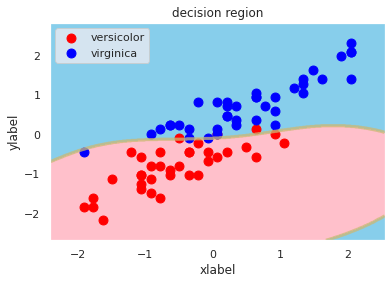

In [36]:
decision_region(X_train_scaled, y_train, svm)

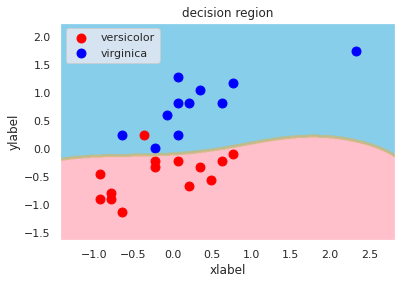

In [37]:
decision_region(X_test_scaled, y_test, svm)

Decision Tree Classifier

In [38]:
from sklearn.tree import *

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_scaled, y_train)
detree_predict = decisiontree.predict(X_test_scaled)
result_tree = pd.DataFrame([detree_predict, y_test], index=['Predict', 'Actual value'])
result_tree

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [39]:
evaluation(y_test, detree_predict)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


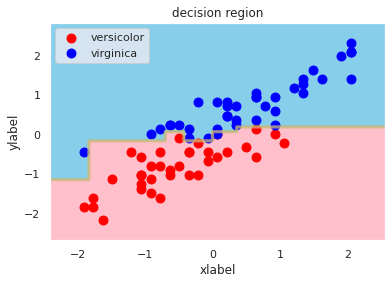

In [40]:
decision_region(X_train_scaled, y_train, decisiontree)

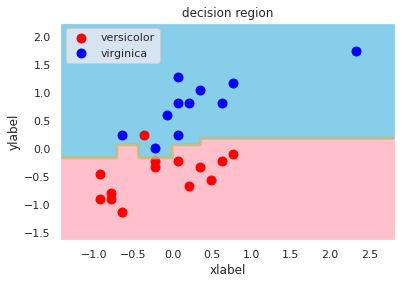

In [41]:
decision_region(X_test_scaled, y_test, decisiontree)

Random forest classifier

In [42]:
from sklearn.ensemble import *

randomforest = RandomForestClassifier()
randomforest.fit(X_train_scaled, y_train)
rafo_predict = randomforest.predict(X_test_scaled)
result_rafo = pd.DataFrame([rafo_predict, y_test], index=['Predict', 'Actual value'])
result_rafo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Predict,1,1,2,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2
Actual value,1,1,1,1,2,1,1,2,2,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2


In [43]:
evaluation(y_test, rafo_predict)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


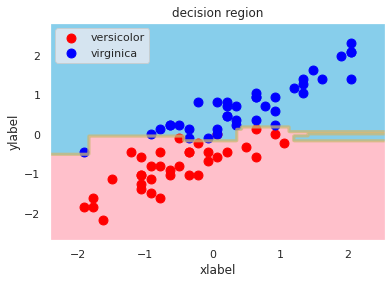

In [44]:
decision_region(X_train_scaled, y_train, randomforest)

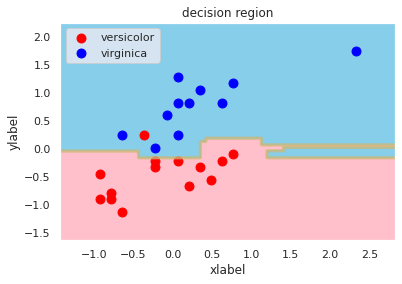

In [45]:
decision_region(X_test_scaled, y_test, randomforest)

### [Problem 9] (Advanced task) Comparison with and without standardization

In [46]:
neigh5_unscaled = KNeighborsClassifier()
neigh5_unscaled.fit(X_train, y_train)
predict_5_unscaled = neigh5_unscaled.predict(X_test)

In [47]:
evaluation(y_test, predict_5_unscaled)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


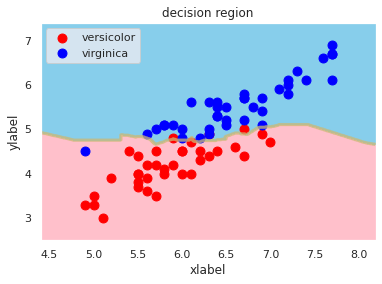

In [48]:
decision_region(X_train, y_train, neigh5_unscaled)

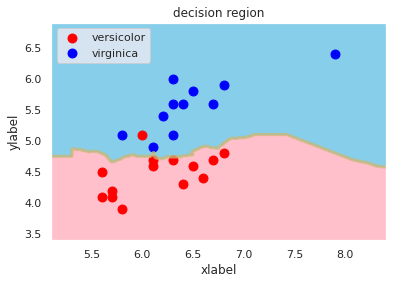

In [49]:
decision_region(X_test, y_test, neigh5_unscaled)

In [50]:
logregression_unscaled = LogisticRegression()
logregression_unscaled.fit(X_train, y_train)
log_predict_unscaled = logregression_unscaled.predict(X_test)

In [51]:
evaluation(y_test, log_predict_unscaled)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


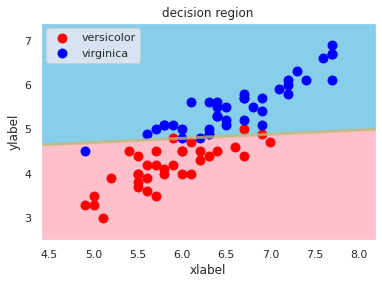

In [52]:
decision_region(X_train, y_train, logregression_unscaled)

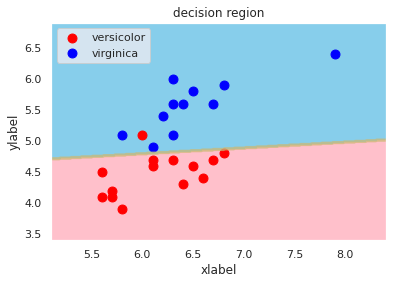

In [53]:
decision_region(X_test, y_test, logregression_unscaled)

In [54]:
svm_unscaled = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_unscaled.fit(X_train, y_train)
svm_predict_unscaled = svm_unscaled.predict(X_test)

In [55]:
evaluation(y_test, svm_predict_unscaled)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


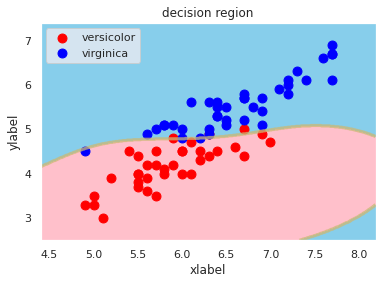

In [56]:
decision_region(X_train, y_train, svm_unscaled)

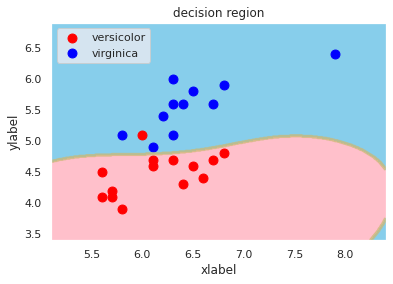

In [57]:
decision_region(X_test, y_test, svm_unscaled)

In [58]:
decisiontree_unscaled = DecisionTreeClassifier()
decisiontree_unscaled.fit(X_train, y_train)
detree_predict_unscaled = decisiontree_unscaled.predict(X_test)

In [59]:
evaluation(y_test, detree_predict_unscaled)

Accuracy : 0.920
Precision: 0.929
Recall   : 0.929
F        : 0.929
Confusion matrix:
 [[13  1]
 [ 1 10]]


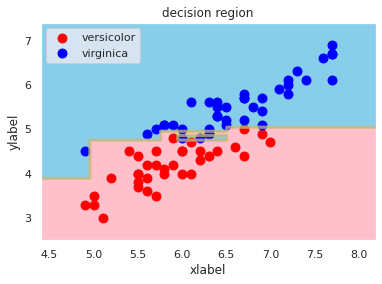

In [60]:
decision_region(X_train, y_train, decisiontree_unscaled)

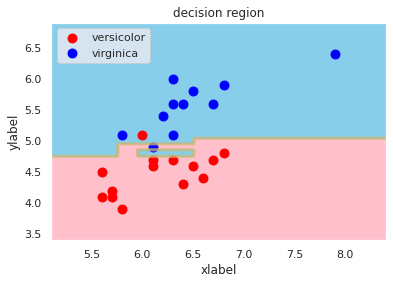

In [61]:
decision_region(X_test, y_test, decisiontree_unscaled)

In [62]:
randomforest_unscaled = RandomForestClassifier()
randomforest_unscaled.fit(X_train, y_train)
rafo_predict_unscaled = randomforest_unscaled.predict(X_test)

In [63]:
evaluation(y_test, rafo_predict_unscaled)

Accuracy : 0.960
Precision: 1.000
Recall   : 0.929
F        : 0.963
Confusion matrix:
 [[13  1]
 [ 0 11]]


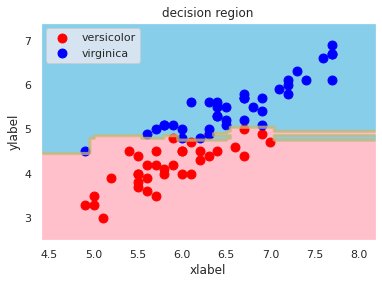

In [64]:
decision_region(X_train, y_train, randomforest_unscaled)

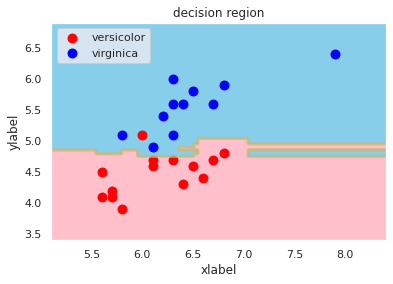

In [65]:
decision_region(X_test, y_test, randomforest_unscaled)

The decision region we got from this problem has y range quite larger in comparision to the standardized decision region.

Therefore, standardization will create standardized values which are useful for tracking data that isn't easy to compare (the data that have large number of samples and large range of interval.

### [Problem 10] (Advance task) Highly accurate method using all objective variables 

In [66]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df = df[['sepal_length', 'petal_length', 'Species']]
df

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [67]:
#Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

In [68]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(112, 2) (38, 2) (112,) (38,)


In [69]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

In [70]:
neigh5_3 = KNeighborsClassifier()
neigh5_3.fit(X_train_scaled3, y_train3)
predict_5_3 = neigh5_3.predict(X_test_scaled3)

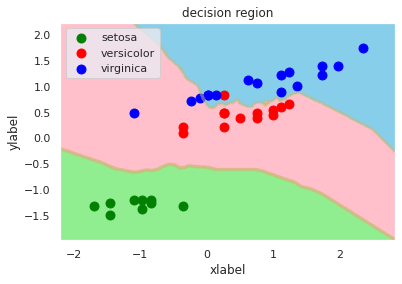

In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    if len(target_names) == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2
    elif len(target_names) == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen', 'pink', 'skyblue']
        n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region_3(X_test_scaled3, y_test3, neigh5_3, target_names=['setosa', 'versicolor', 'virginica'])

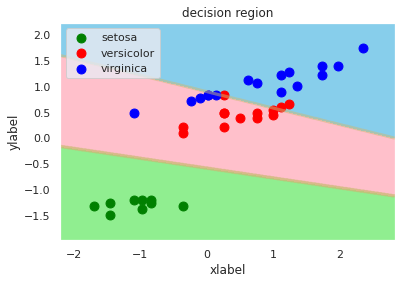

In [72]:
logregression3 = LogisticRegression()
logregression3.fit(X_train_scaled3, y_train3)
log_predict3 = logregression3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, logregression3, target_names=['setosa', 'versicolor', 'virginica'])

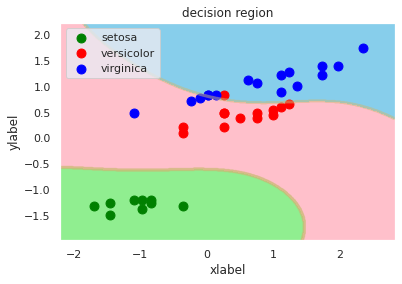

In [73]:
svm3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm3.fit(X_train_scaled3, y_train3)
svm_predict3 = svm3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, svm3, target_names=['setosa', 'versicolor', 'virginica'])

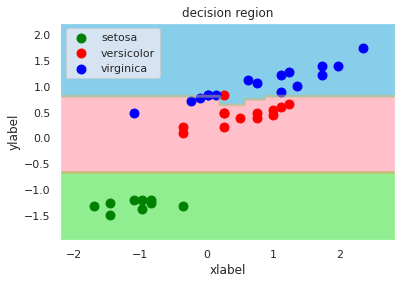

In [74]:
decisiontree3 = DecisionTreeClassifier()
decisiontree3.fit(X_train_scaled3, y_train3)
detree_predict3 = decisiontree3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, decisiontree3, target_names=['setosa', 'versicolor', 'virginica'])

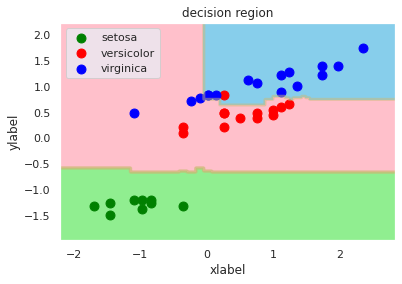

In [75]:
randomforest3 = RandomForestClassifier()
randomforest3.fit(X_train_scaled3, y_train3)
rafo_predict3 = randomforest3.predict(X_test_scaled3)
decision_region_3(X_test_scaled3, y_test3, randomforest3, target_names=['setosa', 'versicolor', 'virginica'])